## Real-time selective sequencing using nanopore technology. Figures and Analysis

### Introduction

Figure 2

This jupyter notebook requires the R kernel. 

Each figure from the manuscript "Real-time seletive sequencing using nanopore technology" is reproduced in this notebook. Figures are presented by panel and in the order in which they are considered in the manuscript.

In [1]:
library(ggplot2)
library("gridExtra")
library("plyr")

## Selective Enrichment of Targeted Regions of the Lambda Genome

### Figure 2A - 30b/s enrichment over the lambda genome.

Here we show enrichment over two 5 kb regions (10-15 kb and 30-35 kb) sequencing with SQK5 chemistry (30 b/s) and applying read until only to the even numbered channels.


In [10]:
system("genomeCoverageBed -ibam data/fig2/RU7/ALL/ALL_RU7_2D.bam -g data/fig2/lambda.genome -d > data/fig2/RU7/ALL/ALL_RU7_2D.txt",intern=FALSE)
system("genomeCoverageBed -ibam data/fig2/RU7/ALL/ALL_RU7_Complement.bam -g data/fig2/lambda.genome -d > data/fig2/RU7/ALL/ALL_RU7_Complement.txt",intern=FALSE)
system("genomeCoverageBed -ibam data/fig2/RU7/ALL/ALL_RU7_Template.bam -g data/fig2/lambda.genome -d > data/fig2/RU7/ALL/ALL_RU7_Template.txt",intern=FALSE)

system("genomeCoverageBed -ibam data/fig2/RU7/EVEN/EVEN_RU7_2D.bam -g data/fig2/lambda.genome -d > data/fig2/RU7/EVEN/EVEN_RU7_2D.txt",intern=FALSE)
system("genomeCoverageBed -ibam data/fig2/RU7/EVEN/EVEN_RU7_Complement.bam -g data/fig2/lambda.genome -d > data/fig2/RU7/EVEN/EVEN_RU7_Complement.txt",intern=FALSE)
system("genomeCoverageBed -ibam data/fig2/RU7/EVEN/EVEN_RU7_Template.bam -g data/fig2/lambda.genome -d > data/fig2/RU7/EVEN/EVEN_RU7_Template.txt",intern=FALSE)

system("genomeCoverageBed -ibam data/fig2/RU7/ODD/ODD_RU7_2D.bam -g data/fig2/lambda.genome -d > data/fig2/RU7/ODD/ODD_RU7_2D.txt",intern=FALSE)
system("genomeCoverageBed -ibam data/fig2/RU7/ODD/ODD_RU7_Complement.bam -g data/fig2/lambda.genome -d > data/fig2/RU7/ODD/ODD_RU7_Complement.txt",intern=FALSE)
system("genomeCoverageBed -ibam data/fig2/RU7/ODD/ODD_RU7_Template.bam -g data/fig2/lambda.genome -d > data/fig2/RU7/ODD/ODD_RU7_Template.txt",intern=FALSE)

In [11]:
EVEN_RU7_Template = read.csv("data/fig2/RU7/EVEN/EVEN_RU7_Template.txt", header = FALSE,sep="\t")
EVEN_RU7_Complement = read.csv("data/fig2/RU7/EVEN/EVEN_RU7_Complement.txt", header = FALSE,sep="\t")
EVEN_RU7_2D = read.csv("data/fig2/RU7/EVEN/EVEN_RU7_2D.txt", header = FALSE,sep="\t")

ODD_RU7_Template = read.csv("data/fig2/RU7/ODD/ODD_RU7_Template.txt", header = FALSE,sep="\t")
ODD_RU7_Complement = read.csv("data/fig2/RU7/ODD/ODD_RU7_Complement.txt", header = FALSE,sep="\t")
ODD_RU7_2D = read.csv("data/fig2/RU7/ODD/ODD_RU7_2D.txt", header = FALSE,sep="\t")

ALL_RU7_Template = read.csv("data/fig2/RU7/ALL/ALL_RU7_Template.txt", header = FALSE,sep="\t")
ALL_RU7_Complement = read.csv("data/fig2/RU7/ALL/ALL_RU7_Complement.txt", header = FALSE,sep="\t")
ALL_RU7_2D = read.csv("data/fig2/RU7/ALL/ALL_RU7_2D.txt", header = FALSE,sep="\t")


RU7<-cbind(EVEN_RU7_Template,EVEN_RU7_Complement$V3,EVEN_RU7_2D$V3,ODD_RU7_Template$V3,ODD_RU7_Complement$V3,ODD_RU7_2D$V3,ALL_RU7_Template$V3,ALL_RU7_Complement$V3,ALL_RU7_2D$V3)
colnames(RU7) <- c("Ref", "Position","E_Template","E_Complement","E_2D","O_Template","O_Complement","O_2D","A_Template","A_Complement","A_2D")


## We import a file containing the read lengths for 2D sequences in this library:
RU7_lengths = read.csv("data/fig2/RU7/ALL/2Dlengths.txt",header = FALSE,sep="\t")
RU7_lengths <- cbind(RU7_lengths,type="2D")


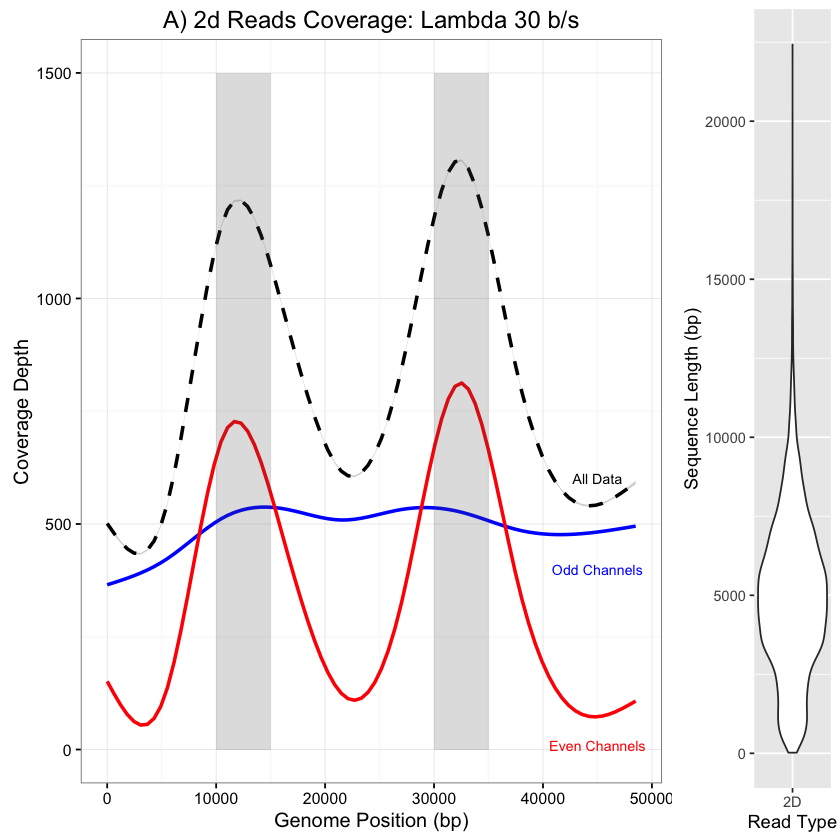

In [12]:
Fig2Ai<-ggplot(data=RU7,aes(x=Position,y=E_2D)) + theme_bw() +geom_smooth(aes(x=Position,y=O_2D),size = 1, color="blue")+geom_smooth(aes(x=Position,y=E_2D),size = 1, color="red") + geom_smooth(aes(x=Position,y=A_2D),size = 1, color="black",linetype="dashed") + labs(x = "Genome Position (bp)")+labs(y="Coverage Depth",title = "A) 2d Reads Coverage: Lambda 30 b/s") + annotate("text", x = 45000, y = 10, label = "Even Channels", color = "red",size=3)+ annotate("text", x = 45000, y = 400, label = "Odd Channels", color = "blue",size=3) + annotate("text", x = 45000, y = 600, label = "All Data", color = "Black",size=3) + annotate("rect", xmin = 10000, xmax = 15000,ymin=0,ymax=1500,alpha = .2) + annotate("rect", xmin = 30000, xmax = 35000,ymin=0,ymax=1500,alpha = .2)
Fig2Aii<-ggplot(data=RU7_lengths,aes(x=type,y=V1))+geom_violin()+ labs(y="Sequence Length (bp)",x="Read Type")
grid.arrange(Fig2Ai,Fig2Aii,       ncol=2, nrow=1, widths=c(16, 4))

### Figure 2B - 70b/s enrichment over the lambda genome.

Here we show enrichment over two 5 kb regions (10-15 kb and 35-40 kb) sequencing with SQK6 chemistry (70 b/s) and applying read until only to the even numbered channels.



In [13]:
system("genomeCoverageBed -ibam data/fig2/RU9/ALL/ALL_RU9_2D.bam -g data/fig2/lambda.genome -d > data/fig2/RU9/ALL/ALL_RU9_2D.txt",intern=FALSE)
system("genomeCoverageBed -ibam data/fig2/RU9/ALL/ALL_RU9_Complement.bam -g data/fig2/lambda.genome -d > data/fig2/RU9/ALL/ALL_RU9_Complement.txt",intern=FALSE)
system("genomeCoverageBed -ibam data/fig2/RU9/ALL/ALL_RU9_Template.bam -g data/fig2/lambda.genome -d > data/fig2/RU9/ALL/ALL_RU9_Template.txt",intern=FALSE)

system("genomeCoverageBed -ibam data/fig2/RU9/EVEN/EVEN_RU9_2D.bam -g data/fig2/lambda.genome -d > data/fig2/RU9/EVEN/EVEN_RU9_2D.txt",intern=FALSE)
system("genomeCoverageBed -ibam data/fig2/RU9/EVEN/EVEN_RU9_Complement.bam -g data/fig2/lambda.genome -d > data/fig2/RU9/EVEN/EVEN_RU9_Complement.txt",intern=FALSE)
system("genomeCoverageBed -ibam data/fig2/RU9/EVEN/EVEN_RU9_Template.bam -g data/fig2/lambda.genome -d > data/fig2/RU9/EVEN/EVEN_RU9_Template.txt",intern=FALSE)

system("genomeCoverageBed -ibam data/fig2/RU9/ODD/ODD_RU9_2D.bam -g data/fig2/lambda.genome -d > data/fig2/RU9/ODD/ODD_RU9_2D.txt",intern=FALSE)
system("genomeCoverageBed -ibam data/fig2/RU9/ODD/ODD_RU9_Complement.bam -g data/fig2/lambda.genome -d > data/fig2/RU9/ODD/ODD_RU9_Complement.txt",intern=FALSE)
system("genomeCoverageBed -ibam data/fig2/RU9/ODD/ODD_RU9_Template.bam -g data/fig2/lambda.genome -d > data/fig2/RU9/ODD/ODD_RU9_Template.txt",intern=FALSE)

In [14]:
EVEN_RU9_Template = read.csv("data/fig2/RU9/EVEN/EVEN_RU9_Template.txt", header = FALSE,sep="\t")
EVEN_RU9_Complement = read.csv("data/fig2/RU9/EVEN/EVEN_RU9_Complement.txt", header = FALSE,sep="\t")
EVEN_RU9_2D = read.csv("data/fig2/RU9/EVEN/EVEN_RU9_2D.txt", header = FALSE,sep="\t")

ODD_RU9_Template = read.csv("data/fig2/RU9/ODD/ODD_RU9_Template.txt", header = FALSE,sep="\t")
ODD_RU9_Complement = read.csv("data/fig2/RU9/ODD/ODD_RU9_Complement.txt", header = FALSE,sep="\t")
ODD_RU9_2D = read.csv("data/fig2/RU9/ODD/ODD_RU9_2D.txt", header = FALSE,sep="\t")

ALL_RU9_Template = read.csv("data/fig2/RU9/ALL/ALL_RU9_Template.txt", header = FALSE,sep="\t")
ALL_RU9_Complement = read.csv("data/fig2/RU9/ALL/ALL_RU9_Complement.txt", header = FALSE,sep="\t")
ALL_RU9_2D = read.csv("data/fig2/RU9/ALL/ALL_RU9_2D.txt", header = FALSE,sep="\t")


RU9<-cbind(EVEN_RU9_Template,EVEN_RU9_Complement$V3,EVEN_RU9_2D$V3,ODD_RU9_Template$V3,ODD_RU9_Complement$V3,ODD_RU9_2D$V3,ALL_RU9_Template$V3,ALL_RU9_Complement$V3,ALL_RU9_2D$V3)
colnames(RU9) <- c("Ref", "Position","E_Template","E_Complement","E_2D","O_Template","O_Complement","O_2D","A_Template","A_Complement","A_2D")


## We import a file containing the read lengths for 2D sequences in this library:
RU9_lengths = read.csv("data/fig2/RU9/ALL/2Dlengths.txt",header = FALSE,sep="\t")
RU9_lengths <- cbind(RU9_lengths,type="2D")

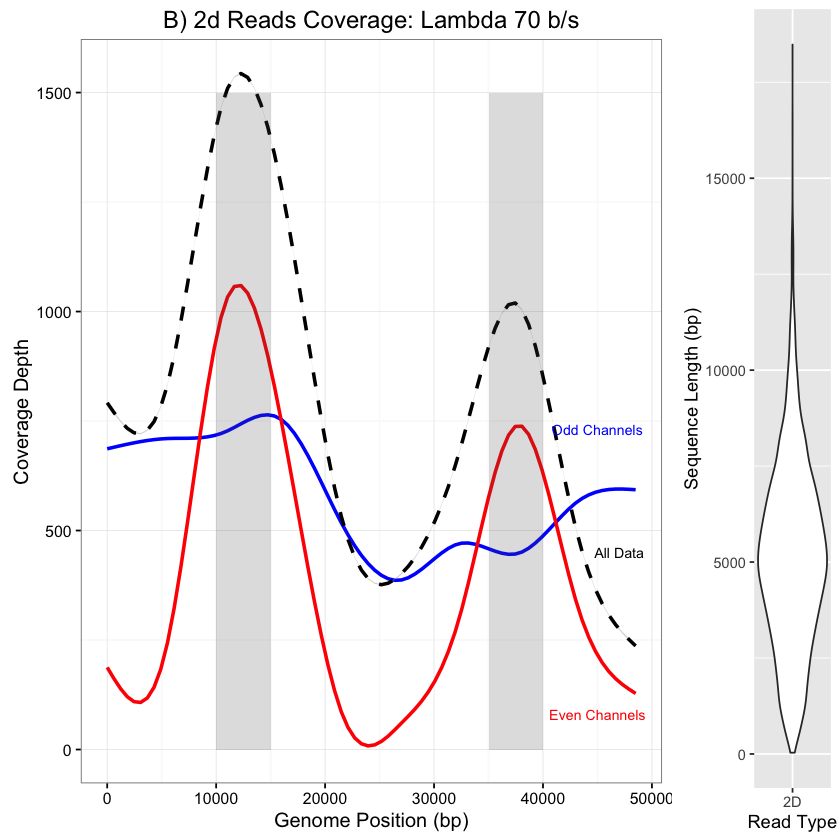

In [15]:
Fig2Bi<-ggplot(data=RU9,aes(x=Position,y=E_2D)) + theme_bw() +geom_smooth(aes(x=Position,y=O_2D),size = 1, color="blue")+geom_smooth(aes(x=Position,y=E_2D),size = 1, color="red") + geom_smooth(aes(x=Position,y=A_2D),size = 1, color="black",linetype="dashed") + labs(x = "Genome Position (bp)")+labs(y="Coverage Depth",title = "B) 2d Reads Coverage: Lambda 70 b/s") + annotate("text", x = 45000, y = 80, label = "Even Channels", color = "red",size=3)+ annotate("text", x = 45000, y = 730, label = "Odd Channels", color = "blue",size=3) + annotate("text", x = 47000, y = 450, label = "All Data", color = "Black",size=3) + annotate("rect", xmin = 10000, xmax = 15000,ymin=0,ymax=1500,alpha = .2) + annotate("rect", xmin = 35000, xmax = 40000,ymin=0,ymax=1500,alpha = .2)
Fig2Bii<-ggplot(data=RU9_lengths,aes(x=type,y=V1))+geom_violin()+ labs(y="Sequence Length (bp)",x="Read Type")
grid.arrange(Fig2Bi,Fig2Bii,       ncol=2, nrow=1, widths=c(16, 4))

### Figure 2C - 70b/s enrichment over the lambda genome - single peak.

Here we show enrichment over one 10 kb regions (15-25 kb) sequencing with SQK6 chemistry (70 b/s) and applying read until to all the channels.


In [16]:
system("genomeCoverageBed -ibam data/fig2/RU11/ALL/ALL_RU9_2D.bam -g data/fig2/lambda.genome -d > data/fig2/RU11/ALL/ALL_RU11_2D.txt",intern=FALSE)
system("genomeCoverageBed -ibam data/fig2/RU11/ALL/ALL_RU9_Complement.bam -g data/fig2/lambda.genome -d > data/fig2/RU11/ALL/ALL_RU11_Complement.txt",intern=FALSE)
system("genomeCoverageBed -ibam data/fig2/RU11/ALL/ALL_RU9_Template.bam -g data/fig2/lambda.genome -d > data/fig2/RU11/ALL/ALL_RU11_Template.txt",intern=FALSE)

In [17]:
ALL_RU11_Template = read.csv("data/fig2/RU11/ALL_RU11_Template.txt", header = FALSE,sep="\t")
ALL_RU11_Complement = read.csv("data/fig2/RU11/ALL_RU11_Complement.txt", header = FALSE,sep="\t")
ALL_RU11_2D = read.csv("data/fig2/RU11/ALL_RU11_2D.txt", header = FALSE,sep="\t")

RU11<-cbind(ALL_RU11_Template,ALL_RU11_Complement$V3,ALL_RU11_2D$V3)
colnames(RU11) <- c("Ref", "Position","Template","Complement","R2D")
RU11_lengths = read.csv("data/fig2/RU11/2Dlengths.txt",header = FALSE,sep="\t")
RU11_lengths <- cbind(RU11_lengths,type="2D")

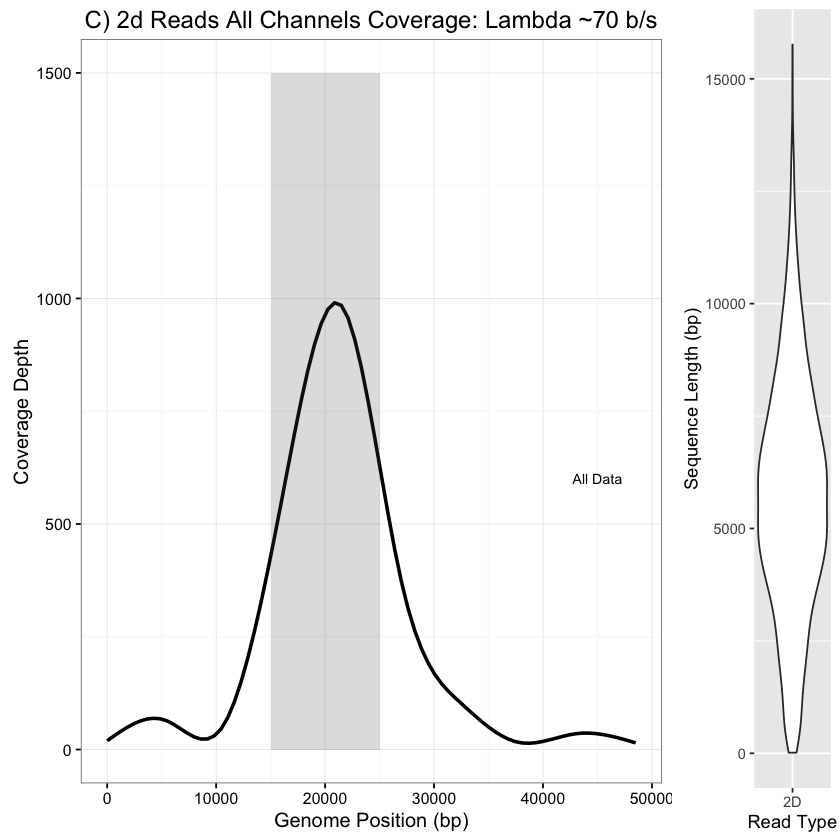

In [18]:
Fig2Ci<-ggplot(data=RU11,aes(x=Position,y=R2D)) + theme_bw() +geom_smooth(aes(x=Position,y=R2D),size = 1, color="black") + labs(x = "Genome Position (bp)")+labs(y="Coverage Depth",title = "C) 2d Reads All Channels Coverage: Lambda ~70 b/s")  + annotate("rect", xmin = 15000, xmax = 25000,ymin=0,ymax=1500,alpha = .2)+ annotate("text", x = 45000, y = 600, label = "All Data", color = "Black",size=3)
Fig2Cii<-ggplot(data=RU11_lengths,aes(x=type,y=V1))+geom_violin()+ labs(y="Sequence Length (bp)",x="Read Type")
grid.arrange(Fig2Ci,Fig2Cii,       ncol=2, nrow=1, widths=c(16, 4))